# Importación de las librerias y carga de archivo STL del Gomboc

In [4]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Cargar archivo STL
mesh = trimesh.load_mesh(r"C:\Users\David\Documents\Material Universidad\Retos\STL\Monostatic_Body_Release.STL")


# Calculo del Tensor de Inercia diagonalizado y los ejes principales de inercia

In [5]:
# Calcular el volumen, centro de masa y el tensor de inercia
volume = mesh.volume
centroid = mesh.center_mass
inertia_tensor = mesh.moment_inertia  # Si deseas considerar densidad, multiplica por la densidad

print("Volumen:", volume)
print("Centro de masa:", centroid)

# Suponiendo que 'inertia_tensor' es tu tensor de inercia 3x3:
eigvals, eigvecs = np.linalg.eigh(inertia_tensor)

print("Momentos principales de inercia:", eigvals)
print("Ejes principales (columnas de eigvecs):", eigvecs)

Volumen: 89212.22492407954
Centro de masa: [80.49488329 88.54194673 95.20570733]
Momentos principales de inercia: [24901669.53172833 29005396.24250979 30434525.59219955]
Ejes principales (columnas de eigvecs): [[ 1.00000000e+00 -1.57687699e-05 -4.48030212e-06]
 [ 1.57688190e-05  1.00000000e+00  1.09607803e-05]
 [ 4.48012928e-06 -1.09608509e-05  1.00000000e+00]]


# Grafica de los eigenvectors o vectores propios del movimiento del Gomboc

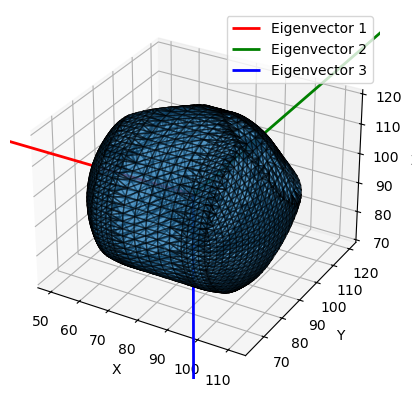

In [6]:
# Crear figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Graficar la malla STL
ax.add_collection3d(Poly3DCollection(mesh.vertices[mesh.faces], alpha=0.5, edgecolor="k"))

# Graficar los vectores propios en el centro de masa
colors = ['r', 'g', 'b']  # Colores para los ejes principales
scale = np.max(eigvals) ** 0.5  # Escalar los vectores para visualización

for i in range(3):  # Para cada eje principal
    ax.quiver(centroid[0], centroid[1], centroid[2], 
              eigvecs[0, i] * scale, eigvecs[1, i] * scale, eigvecs[2, i] * scale, 
              color=colors[i], linewidth=2, label=f'Eigenvector {i+1}')

# Configurar la visualización
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.auto_scale_xyz(mesh.vertices[:, 0], mesh.vertices[:, 1], mesh.vertices[:, 2])

# Mostrar leyenda y gráfico
ax.legend()
plt.show()

# Se definen los triangulos del archivo STL

In [7]:
# Obtener los vértices y caras de la malla
vertices = mesh.vertices
faces = mesh.faces

# Definicion de la posicion de los vertices de cada triangulo
V1 = vertices[faces[:, 0]]
V2 = vertices[faces[:, 1]]
V3 = vertices[faces[:, 2]]

# Calculo de los vectores normales a la superficie

In [8]:
# Producto cruzado de los lados del triángulo
normals = np.cross(V2 - V1, V3 - V1)

# Normalizar los vectores normales
normals /= np.linalg.norm(normals, axis=1, keepdims=True)

print(normals)

[[-0.32841567  0.77452338  0.5406077 ]
 [-0.42981643  0.72318684  0.5406095 ]
 [-0.4776886   0.69250267  0.54060489]
 ...
 [ 0.22626223  0.38399058 -0.89518525]
 [ 0.22626501  0.38399158 -0.89518412]
 [ 0.22626232  0.38399115 -0.89518499]]


# Calculo de los vectores desde el centro de masa a la superficie

In [9]:
midpoints = (V1 + V2 + V3) / 3  # Puntos medios de los triángulos

# Calcular los vectores desde el centro de masa a cada punto medio
vectors = midpoints - centroid

print(vectors)

[[ -9.69789385  21.89183013  12.24958442]
 [-12.12281044  20.59074879  12.24958442]
 [-13.55092374  19.64630604  12.24958442]
 ...
 [  6.35008232   8.63685576 -23.32095697]
 [  6.73496493   9.97851531 -22.64816898]
 [  7.05450941   9.97851531 -22.56740167]]


# Calculo de la altura del centro de masa

In [10]:
def altura_centro_masa(vectors, normals):
    alturas = np.sum(vectors * normals, axis=1)
    return alturas

# Calculamos las alturas (proyecciones)
alturas = altura_centro_masa(vectors, normals)
print("Alturas (proyecciones del vector desde el centro de masa):\n", alturas)

Alturas (proyecciones del vector desde el centro de masa):
 [26.76289417 26.72378335 26.70042649 ... 25.62983181 25.62983403
 25.62983038]
